In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,some_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,11,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,23,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

### Data Cleaning

In [5]:
# Function to classify job title and seniority level

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() \
    or 'principal' in title.lower() or 'snr' in title.lower() or 'snr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'jnr' in title.lower() \
    or 'jnr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [10]:
# Fix state Los Angelos
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [11]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [12]:
# Job description length

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [13]:
# Competitor Count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [15]:
# hourly wage to annual

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [16]:
df['min_salary']

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 742, dtype: int64

In [17]:
df[df.hourly==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [26]:
# Remove \n \r from company_text column

df['company_text'] = df.company_text.apply(lambda x: x.replace('\n', '').replace('\r', ''))

In [27]:
df.columns.values

array(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state',
       'some_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len', 'num_comp'], dtype=object)

In [28]:
df['company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

### EDA

In [29]:
# Describe the data
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,some_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

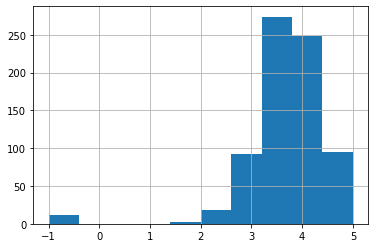

In [33]:
df.Rating.hist()

<AxesSubplot:>

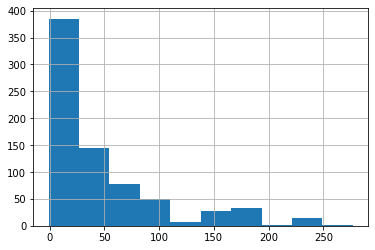

In [34]:
df.age.hist()

<AxesSubplot:>

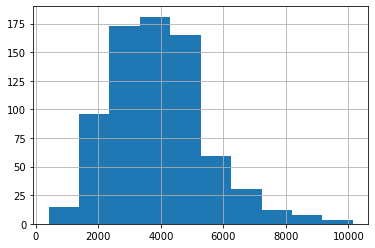

In [35]:
df.desc_len.hist()

C:\Users\Hanuel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_salary'>

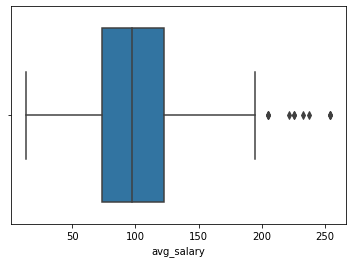

In [37]:
sns.boxplot(df.avg_salary)

In [38]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_text          object
job_state             object
some_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [41]:
# Check the correlation of continuous variables

df[['age', 'avg_salary', 'Rating', 'desc_len', 'num_comp']].corr()

,age,avg_salary,Rating,desc_len,num_comp
age,1.000000,0.019574,0.023162,0.165361,0.127482
avg_salary,0.019574,1.000000,0.013492,0.078093,0.093813
Rating,0.023162,0.013492,1.000000,-0.012631,0.027190
desc_len,0.165361,0.078093,-0.012631,1.000000,0.104846
num_comp,0.127482,0.093813,0.027190,0.104846,1.000000


In [40]:
df.columns 

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [43]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'some_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

Graph for Location: Total = 200


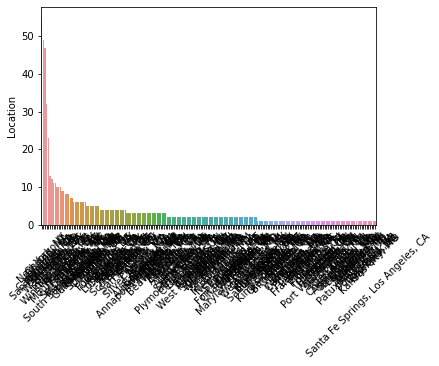

Graph for Headquarters: Total = 198


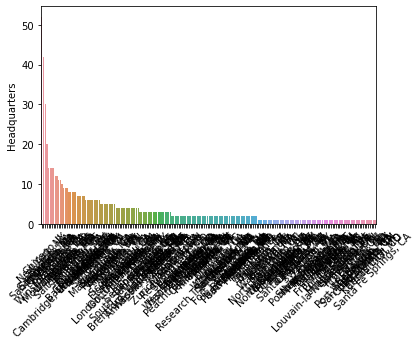

Graph for Size: Total = 9


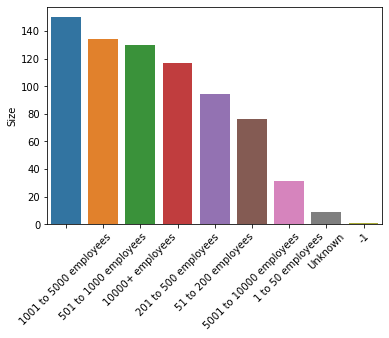

Graph for Type of ownership: Total = 11


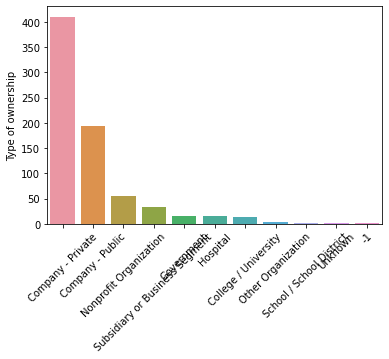

Graph for Industry: Total = 60


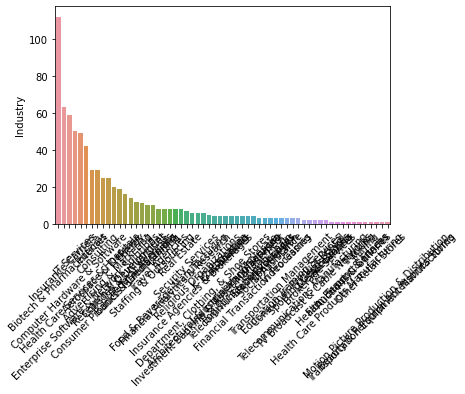

Graph for Sector: Total = 25


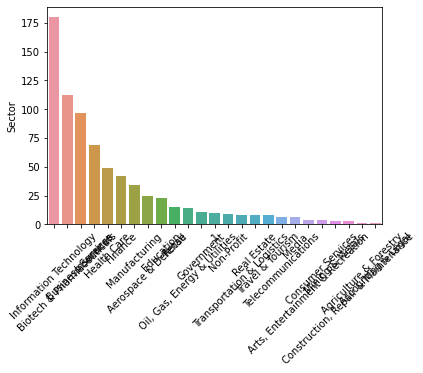

Graph for Revenue: Total = 14


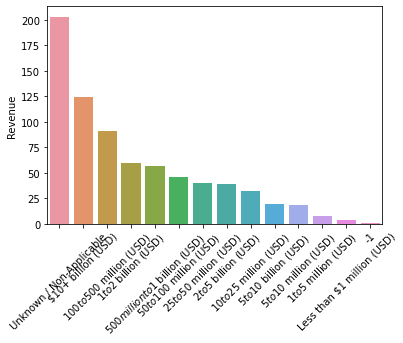

Graph for company_text: Total = 343


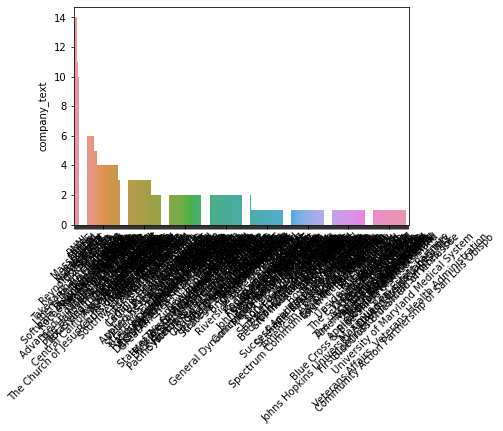

Graph for job_state: Total = 37


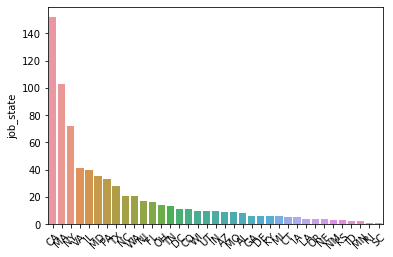

Graph for some_state: Total = 2


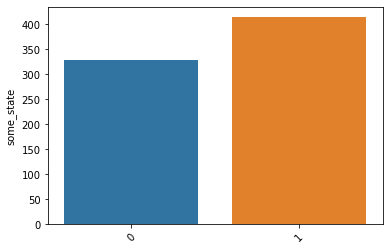

Graph for python_yn: Total = 2


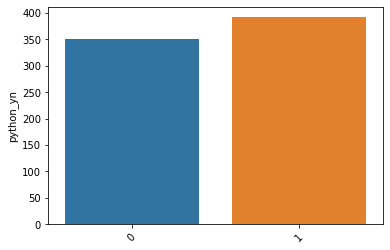

Graph for R_yn: Total = 2


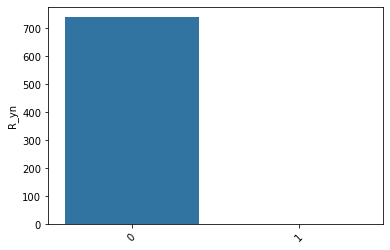

Graph for spark: Total = 2


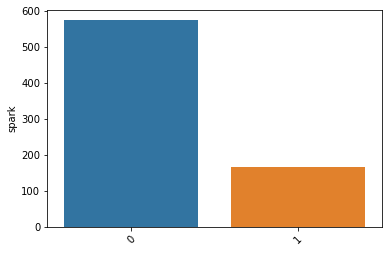

Graph for aws: Total = 2


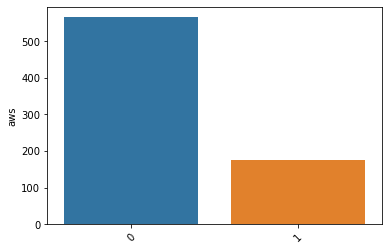

Graph for excel: Total = 2


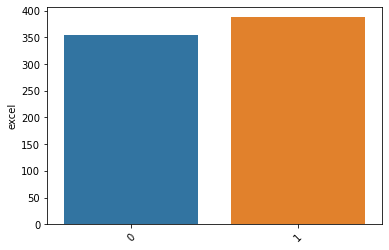

Graph for job_simp: Total = 7


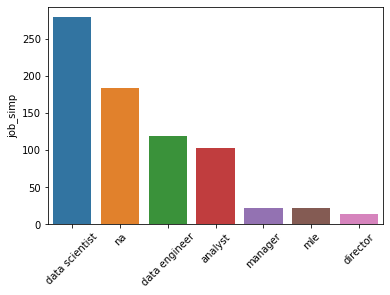

Graph for seniority: Total = 3


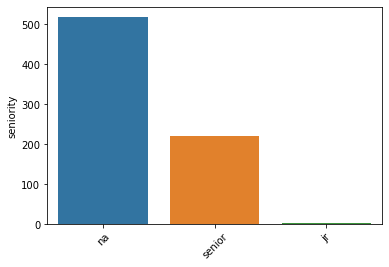

In [46]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for {}: Total = {}".format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.show()

In [47]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [48]:
# Make pivot table

pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [50]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [57]:
pd.set_option('display.max_rows', None)

In [62]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values(['job_state', 'avg_salary'], ascending=False)

avg_salary
job_state job_simp                  
WI        na                       4
          analyst                  3
          data scientist           3
WA        data scientist          17
          analyst                  3
          na                       1
VA        data scientist          18
          data engineer           10
          analyst                  6
          na                       5
          mle                      2
UT        analyst                  4
          data engineer            3
          data scientist           3
TX        data scientist          13
          data engineer            8
          na                       7
TN        data engineer           10
          analyst                  2
          data scientist           1
SC        na                       1
RI        analyst                  1
PA        analyst                  8
          na                       8
          mle                      7
          data scientist           6
          manager                  3
          data engineer            1
OR        data scientist           3
          data engineer            1
OH        data scientist           7
          analyst                  4
          na                       3
NY        data scientist          40
          analyst                 14
          na                      12
          data engineer            4
          mle                      2
NM        data scientist           3
NJ        analyst                  6
          data scientist           4
          data engineer            2
          director                 2
          manager                  2
          na                       1
NE        na                       4
NC        na                      12
          data engineer            6
          data scientist           3
MO        data scientist           3
          na                       3
          analyst                  2
          manager                  1
MN        analyst                  1
          data engineer            1
MI        data scientist           4
          manager                  2
MD        na                      16
          data scientist          13
          analyst                  3
          data engineer            3
MA        na                      46
          data scientist          30
          data engineer           12
          director                 6
          manager                  5
          analyst                  4
LA        data engineer            2
          analyst                  1
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        data engineer            4
          na                       4
          data scientist           2
IL        data scientist          15
          data engineer            8
          director                 6
          na                       6
          analyst                  3
          mle                      2
ID        analyst                  2
IA        data engineer            3
          analyst                  2
GA        data scientist           3
          na                       3
FL        data scientist           7
          analyst                  6
          data engineer            3
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        data engineer            3
          data scientist           3
          na                       3
          analyst                  1
          mle                      1
CA        data scientist          68
          na                      27
          data engineer           25
          analyst                 18
          manager                  9
          mle                 

In [66]:
# Pivot for data sceintist

pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [67]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [68]:
# rating, industry, sector, revenue, num_comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, type of ownership

In [74]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [77]:
for i in df_pivots:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [78]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [79]:
# Make wordcloud of work description

In [86]:
import nltk

In [88]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hanuel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [91]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hanuel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

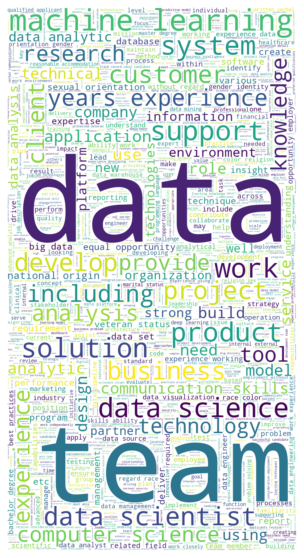

In [92]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stopwords"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = 'white', random_state = 1, stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()